## Домашнее задание №5

#### Горская Елена

Реализован алгоритм Камады-Каваи (тема согласована). 

Ссылка на статью, по которой реализовывала алгоритм: http://vis.pku.edu.cn/course/Visualization_2018F/reading/drawing_general_undirected.pdf

Суть алгоритма:

1. Поиск расстояний между вершинами при помощи алгоритма Флойда–Уоршелла
2. Определение коэффициентов в матрицах K, L
3. В цикле меняем координаты вершин, до тех пор пока определяемое алгоритмом дельта не станет меньше $\epsilon$.

In [ ]:
# библиотеки
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
from scipy.optimize import minimize

import xml.etree.ElementTree as ET

import warnings
warnings.filterwarnings('ignore')

Графы загружаю сразу. Вот они же в более читабельном виде: https://drive.google.com/drive/folders/1AYU-WVQ3VTPXN4O1wvYOA9OFPNMFXipH?usp=sharing

In [ ]:
graphML = b'<?xml version="1.0" encoding="UTF-8"?>\r\n<graphml xmlns="http://graphml.graphdrawing.org/xmlns"  \r\n  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"\r\n  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns\r\n  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">\r\n  <graph id="flow" edgedefault="directed">\r\n    <node id="V0"/>\r\n    <node id="V1"/>\r\n    <node id="V2"/>\r\n    <node id="V3"/>\r\n    <node id="V4"/>\r\n    <node id="V5"/>\r\n    <node id="V6"/>\r\n    <node id="V7"/>\r\n    <node id="V8"/>\r\n    <node id="V9"/>\r\n    <node id="V10"/>\r\n    <node id="V11"/>\r\n    <node id="V12"/>\r\n    <node id="V13"/>\r\n    <node id="V14"/>\r\n    <node id="V15"/>\r\n    <node id="V16"/>\r\n    <node id="V17"/>\r\n    <node id="V18"/>\r\n    <node id="V19"/>\r\n    <node id="V20"/>\r\n    <node id="V21"/>\r\n    <node id="V22"/>\r\n    <node id="V23"/>\r\n    <node id="V24"/>\r\n    <node id="V25"/>\r\n    <node id="V26"/>\r\n    <node id="V27"/>\r\n    <node id="V28"/>\r\n    <node id="V29"/>\r\n    <node id="V30"/>\r\n    <node id="V31"/>\r\n    <node id="V32"/>\r\n    <node id="V33"/>\r\n    <node id="V34"/>\r\n    <node id="V35"/>\r\n    <node id="V36"/>\r\n    <node id="V37"/>\r\n    <node id="V38"/>\r\n    <node id="V39"/>\r\n    <edge source="V0" target="V1"/>\r\n    <edge source="V0" target="V2"/>\r\n    <edge source="V0" target="V3"/>\r\n    <edge source="V1" target="V5"/>\r\n    <edge source="V1" target="V4"/>\r\n    <edge source="V1" target="V6"/>\r\n    <edge source="V2" target="V7"/>\r\n    <edge source="V2" target="V8"/>\r\n    <edge source="V2" target="V9"/>\r\n    <edge source="V3" target="V10"/>\r\n    <edge source="V3" target="V11"/>\r\n    <edge source="V3" target="V12"/>\r\n    <edge source="V4" target="V13"/>\r\n    <edge source="V4" target="V14"/>\r\n    <edge source="V4" target="V15"/>\r\n    <edge source="V5" target="V16"/>\r\n    <edge source="V5" target="V17"/>\r\n    <edge source="V5" target="V18"/>\r\n    <edge source="V6" target="V19"/>\r\n    <edge source="V6" target="V20"/>\r\n    <edge source="V6" target="V21"/>\r\n    <edge source="V7" target="V22"/>\r\n    <edge source="V7" target="V23"/>\r\n    <edge source="V7" target="V24"/>\r\n    <edge source="V8" target="V25"/>\r\n    <edge source="V8" target="V26"/>\r\n    <edge source="V8" target="V27"/>\r\n    <edge source="V9" target="V28"/>\r\n    <edge source="V9" target="V29"/>\r\n    <edge source="V9" target="V30"/>\r\n    <edge source="V10" target="V31"/>\r\n    <edge source="V10" target="V32"/>\r\n    <edge source="V10" target="V33"/>\r\n    <edge source="V11" target="V34"/>\r\n    <edge source="V11" target="V35"/>\r\n    <edge source="V11" target="V36"/>\r\n    <edge source="V12" target="V37"/>\r\n    <edge source="V12" target="V38"/>\r\n    <edge source="V12" target="V39"/>\r\n  </graph>\r\n</graphml>'

graphML_2 = b'<?xml version="1.0" encoding="UTF-8"?>\r\n<graphml xmlns="http://graphml.graphdrawing.org/xmlns"  \r\n  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"\r\n  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns\r\n  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">\r\n  <graph id="flow" edgedefault="directed">\r\n    <node id="V0"/>\r\n    <node id="V1"/>\r\n    <node id="V2"/>\r\n    <node id="V3"/>\r\n    <node id="V4"/>\r\n    <node id="V5"/>\r\n    <node id="V6"/>\r\n    <node id="V7"/>\r\n    <node id="V8"/>\r\n    <node id="V9"/>\r\n    <edge source="V0" target="V1"/>\r\n    <edge source="V0" target="V2"/>\r\n    <edge source="V1" target="V2"/>\r\n    <edge source="V1" target="V3"/>\r\n    <edge source="V1" target="V4"/>\r\n    <edge source="V2" target="V5"/>\r\n    <edge source="V2" target="V4"/>\r\n    <edge source="V3" target="V4"/>\r\n    <edge source="V3" target="V6"/>\r\n    <edge source="V3" target="V7"/>\r\n    <edge source="V4" target="V5"/>\r\n    <edge source="V4" target="V7"/>\r\n    <edge source="V4" target="V8"/>\r\n    <edge source="V5" target="V9"/>\r\n    <edge source="V5" target="V8"/>\r\n    <edge source="V6" target="V7"/>\r\n    <edge source="V7" target="V8"/>\r\n    <edge source="V8" target="V9"/>\r\n  </graph>\r\n</graphml>'

graphML_3 = b'<?xml version="1.0" encoding="UTF-8"?>\r\n<graphml xmlns="http://graphml.graphdrawing.org/xmlns"  \r\n  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"\r\n  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns\r\n  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">\r\n  <graph id="flow" edgedefault="directed">\r\n    <node id="V0"/>\r\n    <node id="V1"/>\r\n    <node id="V2"/>\r\n    <node id="V3"/>\r\n    <node id="V4"/>\r\n    <node id="V5"/>\r\n    <node id="V6"/>\r\n    <node id="V7"/>\r\n    <node id="V8"/>\r\n    <node id="V9"/>\r\n    <node id="V10"/>\r\n    <node id="V11"/>\r\n    <node id="V12"/>\r\n    <node id="V13"/>\r\n    <node id="V14"/>\r\n    <node id="V15"/>\r\n    <edge source="V0" target="V1"/>\r\n    <edge source="V0" target="V2"/>\r\n    <edge source="V0" target="V3"/>\r\n    <edge source="V1" target="V2"/>\r\n    <edge source="V1" target="V3"/>\r\n    <edge source="V2" target="V3"/>\r\n    <edge source="V3" target="V4"/>\r\n    <edge source="V3" target="V8"/>\r\n    <edge source="V3" target="V12"/>\r\n    <edge source="V4" target="V7"/>\r\n    <edge source="V4" target="V5"/>\r\n    <edge source="V4" target="V6"/>\r\n    <edge source="V4" target="V8"/>\r\n    <edge source="V4" target="V12"/>\r\n    <edge source="V5" target="V7"/>\r\n    <edge source="V5" target="V6"/>\r\n    <edge source="V6" target="V7"/>\r\n    <edge source="V8" target="V9"/>\r\n    <edge source="V8" target="V10"/>\r\n    <edge source="V8" target="V11"/>\r\n    <edge source="V8" target="V12"/>\r\n    <edge source="V9" target="V10"/>\r\n    <edge source="V9" target="V11"/>\r\n    <edge source="V10" target="V11"/>\r\n    <edge source="V12" target="V13"/>\r\n    <edge source="V12" target="V14"/>\r\n    <edge source="V12" target="V15"/>\r\n    <edge source="V13" target="V14"/>\r\n    <edge source="V13" target="V15"/>\r\n    <edge source="V14" target="V15"/>\r\n  </graph>\r\n</graphml>'

In [ ]:
# парсинг файла

node_val = "{http://graphml.graphdrawing.org/xmlns}node"
edge_val = "{http://graphml.graphdrawing.org/xmlns}edge"

def parse_graph(xml_file):
  root = ET.fromstring(xml_file)
  nodes = []
  edges = []

  # чтобы вычислить корень
  edges_into = []
  # g - это как раз граф в разметке GraphMl
  g = root[0]

  # ребра храним как список: i-й элемент массива - это список номеров вершин,
  # в которые идут ребра из вершины i
  for node in g.findall(node_val):
    nodes.append(node.get("id"))
  for _ in range(len(nodes)):
    edges.append([])
    edges_into.append([])
  for edge in g.findall(edge_val):
    # номер исходной вершины
    s = nodes.index(edge.get("source"))
    edges[s].append(edge.get("target"))

    t = nodes.index(edge.get("target"))
    edges_into[t].append(edge.get("source"))

  return nodes, edges

def find_incomings(nodes, edges):
  in_edges = []
  for _ in range(len(nodes)):
    in_edges.append([])

  for i in range(len(edges)):
    for v in edges[i]:
      in_edges[nodes.index(v)].append(int(i))
  return in_edges

In [ ]:
nodes, edges = parse_graph(graphML)

In [ ]:
# используется алгоритм Флойда-Уоршелла
def find_distances(nodes, edges):
  n = len(nodes)
  d = np.zeros((n, n))
  inf_num = n * n

  # initialize with INF
  for i in range(n):
    for j in range(n):
        if i != j:
          d[i][j] = inf_num
  
  # handle edges
  for i in range(n):
    for j in range(n):
      if nodes[j] in edges[i]:
        d[i][j] = 1
        d[j][i] = 1
      
  for k in range(n):
    for i in range(n):
      for j in range(n):
        d[i][j] = min(d[i][j], d[i][k] + d[k][j])

  return d


# изначально вершины расположены в круге
def make_circle(n):
  res = np.zeros((n, 2))
  phi = (2 * np.pi) / n
  for i in range(n):
    res[i][0] = np.cos(i * phi)
    res[i][1] = np.sin(i * phi)
  return res


# подсчет матрицы K
def get_k_matrix(n, K, d):
  k_matrix = np.zeros((n, n))
  for i in range(n - 1):
    for j in range(i + 1, n):
      k_matrix[i][j] = K / (d[i][j] * d[i][j])
      k_matrix[j][i] = K / (d[i][j] * d[i][j])
  return k_matrix


# поиск дельты
def get_m_delta(cur_res, i, k, l):
  n = k.shape[0]
  x = cur_res[:, 0]
  y = cur_res[:, 1]

  x_deriv = 0
  y_deriv = 0
  for j in range(n):
    if (i != j):
      dx = x[i] - x[j]
      dy = y[i] - y[j]
      d = math.sqrt(dx ** 2 + dy ** 2)
      k_cur = k[i][j]
      l_cur = l[i][j]

      # formulas 7 and 8 from the article
      x_deriv += k_cur * (dx - l_cur * dx / d)
      y_deriv += k_cur * (dy - l_cur * dy / d)

  return math.sqrt(x_deriv ** 2 + y_deriv ** 2)


# поиск delta_x и delta_y
def get_deltas(cur_res, k, l, i):
  n = k.shape[0]
  x = cur_res[:, 0]
  y = cur_res[:, 1]

  x_deriv = 0
  y_deriv = 0
  xx_deriv = 0
  xy_deriv = 0
  yx_deriv = 0
  yy_deriv = 0
  
  for j in range(n):
    if (i != j):
      dx = x[i] - x[j]
      dy = y[i] - y[j]
      d = math.sqrt(dx ** 2 + dy ** 2)
      k_cur = k[i][j]
      l_cur = l[i][j]
      d_tripl = d * d * d

      # formulas 7 and 8 from the article
      x_deriv += k_cur * (dx - l_cur * dx / d)
      y_deriv += k_cur * (dy - l_cur * dy / d)

      # formulas 13-16 from the article
      xx_deriv += k_cur * (1 - l_cur * dy * dy / d_tripl)
      xy_deriv += k_cur * (l_cur * dx * dy / d_tripl)
      yx_deriv += k_cur * (l_cur * dy * dx / d_tripl)
      yy_deriv += k_cur * (1 - l_cur * dx * dx / d_tripl)

  # by formulas 11-12 from the article
  delta_x = (- x_deriv * yy_deriv + xy_deriv * y_deriv) / (xx_deriv * yy_deriv - xy_deriv * yx_deriv)
  delta_y = (- xx_deriv * y_deriv + x_deriv * yx_deriv) / (xx_deriv * yy_deriv - xy_deriv * yx_deriv)

  return delta_x, delta_y


def do_kawai_algo(nodes, edges, l_size=10, k_size=10, eps=0.001):
  d_matrix = find_distances(nodes, edges)
  res = make_circle(len(nodes))
  l_matrix = (d_matrix * l_size) / d_matrix.max()
  k_matrix = get_k_matrix(len(nodes), k_size, d_matrix)
  max_delta = 1

  while (True):
    max_delta = get_m_delta(res, 0, k_matrix, l_matrix)
    max_idx = 0
    for i in range(1, len(nodes)):
      curr_m = get_m_delta(res, i, k_matrix, l_matrix)
      if (curr_m > max_delta):
        max_delta = curr_m
        max_idx = i
    if (max_delta < eps):
      break

    while (max_delta > eps):
      delta_x, delta_y = get_deltas(res, k_matrix, l_matrix, max_idx)
      res[max_idx][0] += delta_x
      res[max_idx][1] += delta_y
      max_delta = get_m_delta(res, max_idx, k_matrix, l_matrix)

  return res 


Результат для первого графа:

In [ ]:
res_1 = do_kawai_algo(nodes, edges)

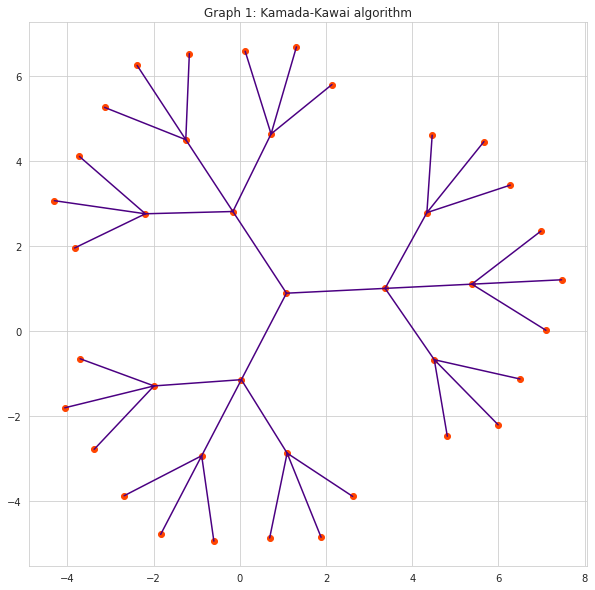

In [ ]:
sns.set_style("whitegrid")
in_edges = find_incomings(nodes, edges)
plt.figure(figsize=(10, 10))
plt.scatter(res_1[:, 0], res_1[:, 1], c='orangered', marker='o')
for i in range(len(in_edges)):
  for v in in_edges[i]:
    plt.plot([res_1[i][0], res_1[int(v)][0]], 
            [res_1[i][1], res_1[v][1]], color = 'indigo')

plt.title("Graph 1: Kamada-Kawai algorithm")
plt.show()

Графы 2 и 3 брала из примеров статьи (рисунки 3b, 3c соответственно), чтобы проверить корректность работы.

Результат для второго графа:

In [ ]:
nodes_2, edges_2 = parse_graph(graphML_2)

res_2 = do_kawai_algo(nodes_2, edges_2)

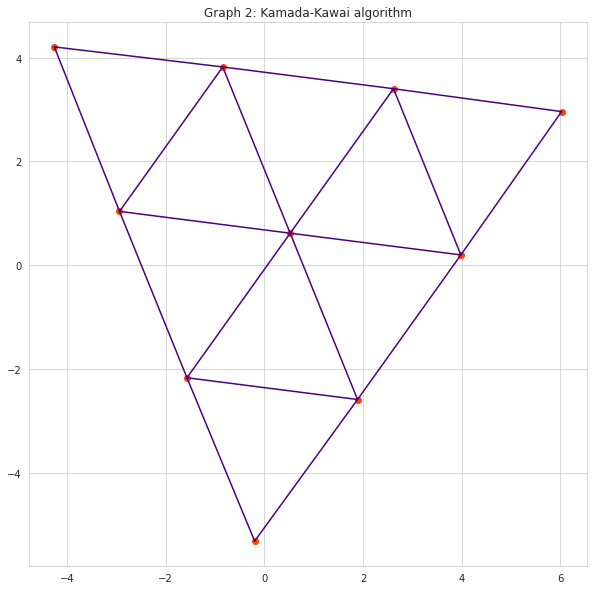

In [ ]:
in_edges_2 = find_incomings(nodes_2, edges_2)
plt.figure(figsize=(10, 10))
plt.scatter(res_2[:, 0], res_2[:, 1], c='orangered', marker='o')
for i in range(len(in_edges_2)):
  for v in in_edges_2[i]:
    plt.plot([res_2[i][0], res_2[int(v)][0]], 
            [res_2[i][1], res_2[v][1]], color = 'indigo')

plt.title("Graph 2: Kamada-Kawai algorithm")
plt.show()

Результат для третьего графа:

In [ ]:
nodes_3, edges_3 = parse_graph(graphML_3)

res_3 = do_kawai_algo(nodes_3, edges_3)

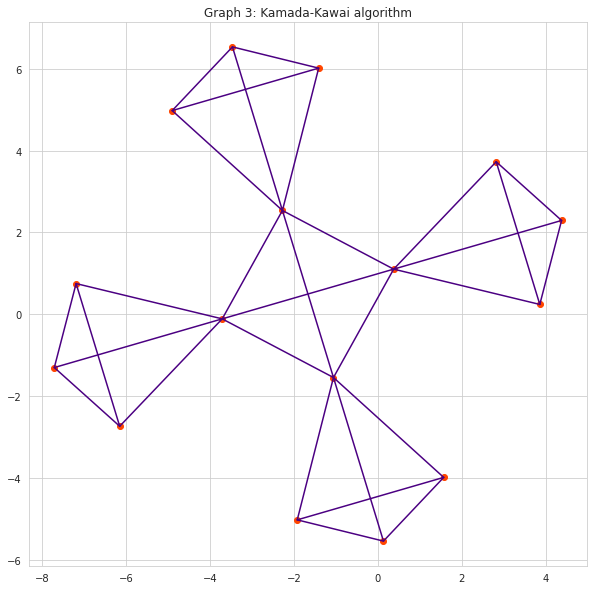

In [ ]:
in_edges_3 = find_incomings(nodes_3, edges_3)
plt.figure(figsize=(10, 10))
plt.scatter(res_3[:, 0], res_3[:, 1], c='orangered', marker='o')
for i in range(len(in_edges_3)):
  for v in in_edges_3[i]:
    plt.plot([res_3[i][0], res_3[int(v)][0]], 
            [res_3[i][1], res_3[v][1]], color = 'indigo')

plt.title("Graph 3: Kamada-Kawai algorithm")
plt.show()

Итого, для второго и третьего рисунков результат получился такой, как и должен быть согласно статье. Для первого рисунка результат вышел тоже довольно красивый.

В целом, рассматриваемый алгоритм дает достаточно неплохие и визуально красивые результаты.